In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import sklearn.svm as svm
import pylab as pl
import seaborn as sns
import random
from matplotlib import pyplot as plt
#from ipywidgets import interact
from sklearn import svm, grid_search, datasets
from sklearn import cross_validation as cv
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split

In [2]:
iris = datasets.load_iris()

In [3]:
# データ加工のために自前の変数に入れる
data = iris.data
target = iris.target

In [4]:
# データの確認
pd.DataFrame(data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
# ラベルを確認
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# データをシャッフルするための処理
n_samples, n_features = data.shape
p = range(n_samples)
random.seed(0)
random.shuffle(p)
data, target = data[p], target[p]

In [7]:
# シャッフル後のデータを確認
pd.DataFrame(data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,3.4,5.6,2.4
1,5.2,3.4,1.4,0.2
2,4.3,3.0,1.1,0.1
3,6.9,3.1,5.1,2.3
4,5.1,2.5,3.0,1.1
5,6.4,3.1,5.5,1.8
6,6.5,3.2,5.1,2.0
7,6.7,3.3,5.7,2.1
8,7.7,3.8,6.7,2.2
9,5.1,3.4,1.5,0.2


In [8]:
# シャッフル後のラベルを確認
target

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2])

In [9]:
# まず、SVMの簡単な使い方
classifier =SVC(probability=True) #モデルのインスタンス作成
classifier.fit(data[:-5],target[:-5]) #最後の5レコード以外を使って学習する

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#最後の5レコードについて予測を行う。シャッフル後のラベルと比較してみましょう。
classifier.predict(data[-5:]) 

array([1, 0, 1, 2, 2])

In [11]:
# 同じことを一行で書くとこんな感じ
SVC(probability=True).fit(data[:-5],target[:-5]).predict(data[-5:])

array([1, 0, 1, 2, 2])

In [12]:
#予測結果のスコアを0-1で正規化した値
score_svc=classifier.predict_proba(data[-5:])
pd.DataFrame(score_svc,columns=iris.target_names)

,setosa,versicolor,virginica
0,0.008408,0.988551,0.003040
1,0.962351,0.017005,0.020644
2,0.008414,0.987923,0.003663
3,0.008960,0.008375,0.982665
4,0.011022,0.462542,0.526436


In [13]:
# SVMは識別境界面からの距離もスコアリングに使える
classifier.decision_function_shape="ovr"
pd.DataFrame(classifier.decision_function(data[-5:]),columns=iris.target_names)

,setosa,versicolor,virginica
0,0.331160,1.500000,1.168840
1,1.622503,1.197348,0.180149
2,0.312435,1.506563,1.181002
3,0.312501,1.116463,1.571036
4,0.357198,0.824262,1.818540


In [14]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [15]:
# データを分割するための別法
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.5, random_state=0)

In [16]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [17]:
#予測結果の詳細の最初の５レコード
pd.DataFrame(probas,columns=iris.target_names).head(5)

,setosa,versicolor,virginica
0,0.923997,0.055080,0.020923
1,0.010337,0.044433,0.945230
2,0.026279,0.943597,0.030123
3,0.089550,0.888059,0.022391
4,0.015965,0.024258,0.959777


In [18]:
#予測結果
pred

array([0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 2, 0])

In [19]:
#正解
target_test

array([0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 2, 0])

In [20]:
# 予測と正解の比較。第一引数が行、第二引数が列を表す。
#pd.DataFrame(confusion_matrix([0, 0, 0],[1,1,1])) #縦横が分からなくなったらこれを実行する
pd.DataFrame(confusion_matrix(pred, target_test))

,0,1,2
0,23,0,0
1,0,27,1
2,0,1,23


In [21]:
# cv=5 で５分割クロスバリデーションし精度を計算
score=cv.cross_val_score(classifier,data,target,cv=5,n_jobs=-1)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9667 (+/- 0.0365)


In [22]:
#データをシャッフルしてクロスバリデーションする別法。たぶんこれが一番簡単な方法
data_shuffle,target_shuffle=shuffle(iris.data,iris.target)
score = cv.cross_val_score(classifier,data_shuffle,target_shuffle,n_jobs=-1,cv=5)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9800 (+/- 0.0163)


In [23]:
# AUC スコアを出そうと思ったらターゲットをバイナリ（二値）にしないといけないっぽい。
# そこで、ラベルが2のものを無視して、ラベル0のものとラベル1のものを区別する。
data, target = iris.data[iris.target != 2], iris.target[iris.target != 2]

In [24]:
# 二値になっていることを確認
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# データのシャッフル
n_samples, n_features = data.shape
p = range(n_samples)
random.seed(0)
random.shuffle(p)
data, target = data[p], target[p]

In [26]:
# シャッフルされたことを確認
target

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

In [27]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [28]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [29]:
# ROC curve のAUCスコアを出す。ラベル0とラベル1の区別は簡単
fpr, tpr, thresholds = roc_curve(target_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 1.000000


In [30]:
# ラベルが0のものを無視して、ラベル1のものとラベル2のものを区別する。
data, target = iris.data[iris.target != 0], iris.target[iris.target != 0]

In [31]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# データのシャッフル
n_samples, n_features = data.shape
p = range(n_samples)
random.seed(0)
random.shuffle(p)
data, target = data[p], target[p]

In [33]:
# ラベルはバイナリ(0か1)でないといけないので、ここでは1のものを0と呼び、2のものを1と呼ぶように変換する。
target = [label - 1 for label in target]

In [34]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [35]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [36]:
# ROC curve のAUCスコアを出す
fpr, tpr, thresholds = roc_curve(target_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.995200


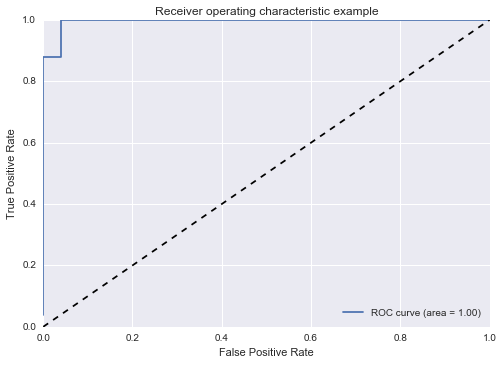

In [37]:
# ROC curve を描く
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [38]:
# PR curve のAUCスコアを出す
precision, recall, thresholds = precision_recall_curve(target_test, probas[:, 1])
area = auc(recall, precision)
print "Area Under Curve: %0.2f" % area

Area Under Curve: 1.00


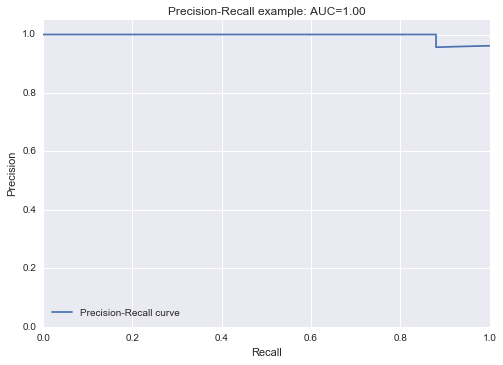

In [39]:
# PR curve を描く
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [40]:
# 予測を難しくするため、不要な特徴量（ノイズ）を加える
np.random.seed(0)
data = np.c_[data, np.random.randn(n_samples, 96)]

In [41]:
#新しいデータを確認。最初の４列は分類に寄与して、後ろの96列は分類に寄与しないはず。
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7.2,3.0,5.8,1.6,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,...,1.178780,-0.179925,-1.070753,1.054452,-0.403177,1.222445,0.208275,0.976639,0.356366,0.706573
1,6.4,3.2,4.5,1.5,0.010500,1.785870,0.126912,0.401989,1.883151,-1.347759,...,-0.643618,-2.223403,0.625231,-1.602058,-1.104383,0.052165,-0.739563,1.543015,-1.292857,0.267051
2,6.1,3.0,4.9,1.8,-0.039283,-1.168093,0.523277,-0.171546,0.771791,0.823504,...,-2.030684,2.064493,-0.110541,1.020173,-0.692050,1.536377,0.286344,0.608844,-1.045253,1.211145
3,6.7,3.3,5.7,2.1,0.689818,1.301846,-0.628088,-0.481027,2.303917,-1.060016,...,0.049495,0.493837,0.643314,-1.570623,-0.206904,0.880179,-1.698106,0.387280,-2.255564,-1.022507
4,6.8,3.0,5.5,2.1,0.038631,-1.656715,-0.985511,-1.471835,1.648135,0.164228,...,-2.016407,-0.539455,-0.275671,-0.709728,1.738873,0.994394,1.319137,-0.882419,1.128594,0.496001
5,6.6,2.9,4.6,1.3,0.771406,1.029439,-0.908763,-0.424318,0.862596,-2.655619,...,0.354758,0.616887,0.008628,0.527004,0.453782,-1.829740,0.037006,0.767902,0.589880,-0.363859
6,5.6,2.9,3.6,1.3,-0.805627,-1.118312,-0.131054,1.133080,-1.951804,-0.659892,...,0.452489,0.097896,-0.448165,-0.649338,-0.023423,1.079195,-2.004216,0.376877,-0.545712,-1.884586
7,6.5,3.0,5.8,2.2,-1.945703,-0.912783,0.219510,0.393063,-0.938982,1.017021,...,0.039767,-1.566995,-0.451303,0.265688,0.723100,0.024612,0.719984,-1.102906,-0.101697,0.019279
8,5.8,2.7,5.1,1.9,1.849591,-0.214167,-0.499017,0.021351,-0.919113,0.192754,...,-1.032643,-0.436748,-1.642965,-0.406072,-0.535270,0.025405,1.154184,0.172504,0.021062,0.099454
9,5.8,2.6,4.0,1.2,0.227393,-1.016739,-0.114775,0.308751,-1.370760,0.865653,...,-0.947489,0.244443,1.401345,-0.410382,0.528944,0.246148,0.863520,-0.804754,2.346647,-1.279161


In [42]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [43]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [44]:
# ROC curve のAUCスコアを出す
fpr, tpr, thresholds = roc_curve(target_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.742400


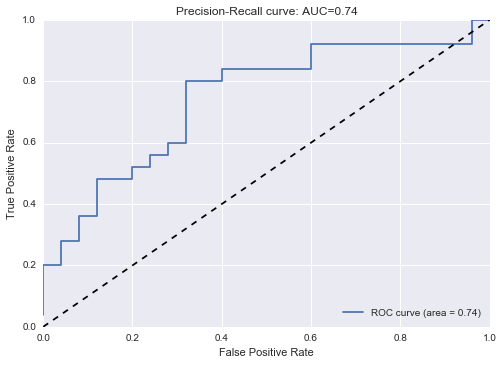

In [45]:
# ROC curve を描く
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Precision-Recall curve: AUC=%0.2f' % roc_auc)
pl.legend(loc="lower right")
pl.show()

In [46]:
# PR curve のAUCスコアを出す
precision, recall, thresholds = precision_recall_curve(target_test, probas[:, 1])
area = auc(recall, precision)
print "Area Under Curve: %0.2f" % area

Area Under Curve: 0.76


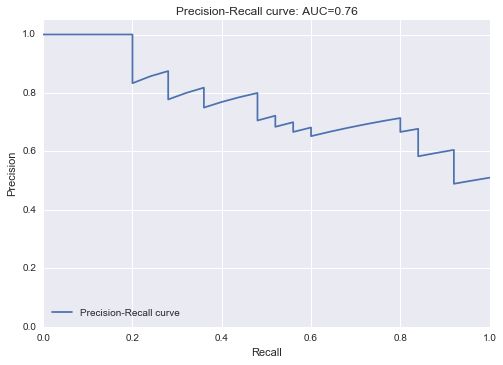

In [47]:
# PR curve を描く
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [48]:
# グリッドサーチは、様々な条件でSVMを動かしてベストなパラメーターを探す手法
# グリッドサーチを行うためのパラメーター
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [49]:
# ベストなパラメーターを探し当てるためのグリッドサーチ
clf = grid_search.GridSearchCV(SVC(C=1), parameters, cv=5, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [50]:
# ベストなパラメーターを探し当てるためのグリッドサーチ
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print '\n' + '='*50
    print score
    print '='*50

    clf = grid_search.GridSearchCV(SVC(C=1), parameters, cv=5, scoring=score, n_jobs=-1)
    clf.fit(data_train, target_train)

    print "\n+ ベストパラメータ:\n"
    print clf.best_estimator_

    print"\n+ トレーニングデータでCVした時の平均スコア:\n"
    for params, mean_score, all_scores in clf.grid_scores_:
        print "{:.3f} (+/- {:.3f}) for {}".format(mean_score, all_scores.std() / 2, params)

    print "\n+ テストデータでの識別結果:\n"
    target_true, target_pred = target_test, clf.predict(data_test)
    print classification_report(target_true, target_pred)


accuracy

+ ベストパラメータ:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

+ トレーニングデータでCVした時の平均スコア:

0.640 (+/- 0.051) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.640 (+/- 0.051) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.640 (+/- 0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.640 (+/- 0.051) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.640 (+/- 0.068) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.640 (+/- 0.040) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.640 (+/- 0.068) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.640 (+/- 0.068) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.620 (+/- 0.066) for {'kernel': 'linear', 'C': 1}
0.620 (+/- 0.066) for {'kernel': 'linear', 'C': 10}
0.620 (+/- 0.066) for {'kernel': 'linear', 'C': 100}
0.620 (+/- 0.066) for {'kernel': 'linear', '